# Preliminary Modeling

In [112]:
# imports
import housing as hous
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn stuff
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer #, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score, mean_absolute_error

In [17]:
def metrics(y, preds, model):
    mse = np.round(mean_squared_error(y, preds))
    rmse = np.round(root_mean_squared_error(y, preds))
    r2 = np.round(r2_score(y, preds),5)
    mae = np.round(mean_absolute_error(y, preds))
    print(f"Mean squared error: {mse}\n")
    print(f"Root mean squared error: {rmse}\n")
    print(f"R2 score: {r2}\n")
    print(f"Mean absolute error: {mae}\n")

    return pd.DataFrame([{'model': model, 'mean_sq_err': mse, 'root_mean_sq_err': rmse, 'r2': r2, 'mean_abs_err': mae}])

## Data Preparation

In [3]:
data = pd.read_csv('../data/train_ord_encode.csv')

data.head()

,id,pid,ms_subclass,ms_zoning,lot_area,alley,land_contour,lot_config,neighborhood,bldg_type,...,exter_cond_ord,bsmt_cond_ord,bsmt_exposure_ord,heating_qc_ord,electrical_ord,kitchen_qual_ord,functional_ord,garage_qual_ord,garage_cond_ord,paved_drive_ord
0,109,533352170,60,RL,13517,no,Lvl,CulDSac,Sawyer,1Fam,...,3,3,1,5,5,4,8,3,3,3
1,544,531379050,60,RL,11492,no,Lvl,CulDSac,SawyerW,1Fam,...,3,3,1,5,5,4,8,3,3,3
2,153,535304180,20,RL,7922,no,Lvl,Inside,NAmes,1Fam,...,4,3,1,3,5,4,8,3,3,3
3,318,916386060,60,RL,9802,no,Lvl,Inside,Timber,1Fam,...,3,3,1,4,5,3,8,3,3,3
4,255,906425045,50,RL,14235,no,Lvl,Inside,SawyerW,1Fam,...,3,4,1,3,5,3,8,3,3,1


In [4]:
data.shape

(2049, 87)

In [5]:
data_test= pd.read_csv('../data/test_ord_encode.csv')

In [6]:
features_all = list(set(data.columns.to_list()).difference(set(['id', 'pid', 'saleprice'])))

In [7]:
# these are the features I will start with 

feat_ss = [
    'overall_qual', 'gr_liv_area'#, 'utilities_ord', 'house_age', 'kitchen_qual_ord', 'overall_cond', 
    #'garage_area', 'bsmtfin_sf_2', 'lot_area', 'land_slope_ord', 'half_bath', 'fireplaces', 
    #'heating_qc_ord', 'pool_area', 'electrical_ord', 'low_qual_fin_sf', 'exter_cond_ord', '3ssn_porch', 
    #'open_porch_sf', 'screen_porch', 'garage_qual_ord', 'paved_drive_ord', 'bsmt_exposure_ord', 
    #'bsmtfin_sf_1', '1st_flr_sf', 'kitchen_abvgr', 'lot_shape_ord', 'exter_qual_ord', 'bsmt_half_bath', 
    #'bsmt_qual_ord', 'street_ord', 'garage_age', 'bsmt_cond_ord', 'wood_deck_sf', 'misc_val', 'time_between', 
    #'remod_add_age', '2nd_flr_sf', 'bsmt_unf_sf', 'enclosed_porch', 'bsmt_full_bath', 'full_bath', 
    #'garage_cond_ord', 'bedroom_abvgr', 'mas_vnr_area', 'functional_ord'
]

feat_ohe = [
    'house_style', 'neighborhood', 'heating', 'ms_zoning',
    'sale_type', 'land_contour', 'roof_style', 
    'foundation', 'lot_config', 'garage_type', 'bldg_type', 'central_air', 
    'mas_vnr_type', 'roof_matl', 'misc_feature', 'alley'
]


#feat_encoded = [
#    'is_remod', 'is_rr_near',# 'is_rr_adj', 'is_feeder_st', 'is_artery_st', 'is_pos_near', 'is_pos_adj', 
#    'ext_vinyl'#, 'ext_metal', 'ext_hardboard', 'ext_wood_side', 'ext_plywood', 'ext_cement_bd', 
#    #'ext_brick_face', 'ext_wood_shingle', 'ext_asbestos_shingle', 'ext_stucco'
#]

## Model Creations

In [8]:
X= data[feat_ss + feat_ohe]
y= data['saleprice']

X.shape, y.shape

((2049, 18), (2049,))

In [9]:
X_test = data_test[feat_ss + feat_ohe]
X_test.shape

(878, 18)

In [10]:
X_train, X_val, y_train, y_val= train_test_split(X, y)

In [11]:
ct= ColumnTransformer([
    ('ss', StandardScaler(), feat_ss),
    #('onehot', OneHotEncoder(drop='first', min_frequency= 0.005, handle_unknown= 'infrequent_if_exist'), feat_ohe),
    ('ohe', OneHotEncoder(min_frequency= 0.007, handle_unknown= 'infrequent_if_exist'), feat_ohe)
], remainder='passthrough')

## Linear Model

In [12]:
pipe_linear = Pipeline(
    [
        ('ct', ct),
        ('lr', LinearRegression())
    ]
)

pipe_linear.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ss', StandardScaler(),
                                                  ['overall_qual',
                                                   'gr_liv_area']),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                min_frequency=0.007),
                                                  ['house_style',
                                                   'neighborhood', 'heating',
                                                   'ms_zoning', 'sale_type',
                                                   'land_contour', 'roof_style',
                                                   'foundation', 'lot_config',
                                                   'garage_type', 'bldg_type',
                                                   'central_air',
                                                   'mas_vnr_type', 'roof_matl',
                                                   'misc_feature',
                                                   'alley'])])),
                ('lr', LinearRegression())])

In [13]:
pipe_linear.score(X_val, y_val)

0.7996088352771148

In [15]:
linear_scores = metrics(y_val, pipe_linear.predict(X_val), 'linear')

Mean squared error: 1264004213.0

Root mean squared error: 35553.0

R2 score: 0.79961

Mean absolute error: 22283.0



In [100]:
coefs_0 = pipe_linear.named_steps['lr'].coef_
intercept = pipe_linear.named_steps['lr'].intercept_

In [101]:
pd.DataFrame(coefs_0)

,0
0,24936.957679
1,37775.461690
2,-9645.821917
3,13336.383018
4,-21509.352673
...,...
79,-5384.338843
80,8343.726963
81,2069.544227
82,-6416.165671


In [109]:
coefs = pd.DataFrame(coefs_0, index=pipe_linear.named_steps['ct'].get_feature_names_out(), columns= ['coef'])

In [110]:
coefs

,coef
ss__overall_qual,24936.957679
ss__gr_liv_area,37775.461690
ohe__house_style_1.5Fin,-9645.821917
ohe__house_style_1Story,13336.383018
ohe__house_style_2.5Unf,-21509.352673
...,...
ohe__misc_feature_no,-5384.338843
ohe__misc_feature_infrequent_sklearn,8343.726963
ohe__alley_Grvl,2069.544227
ohe__alley_Pave,-6416.165671


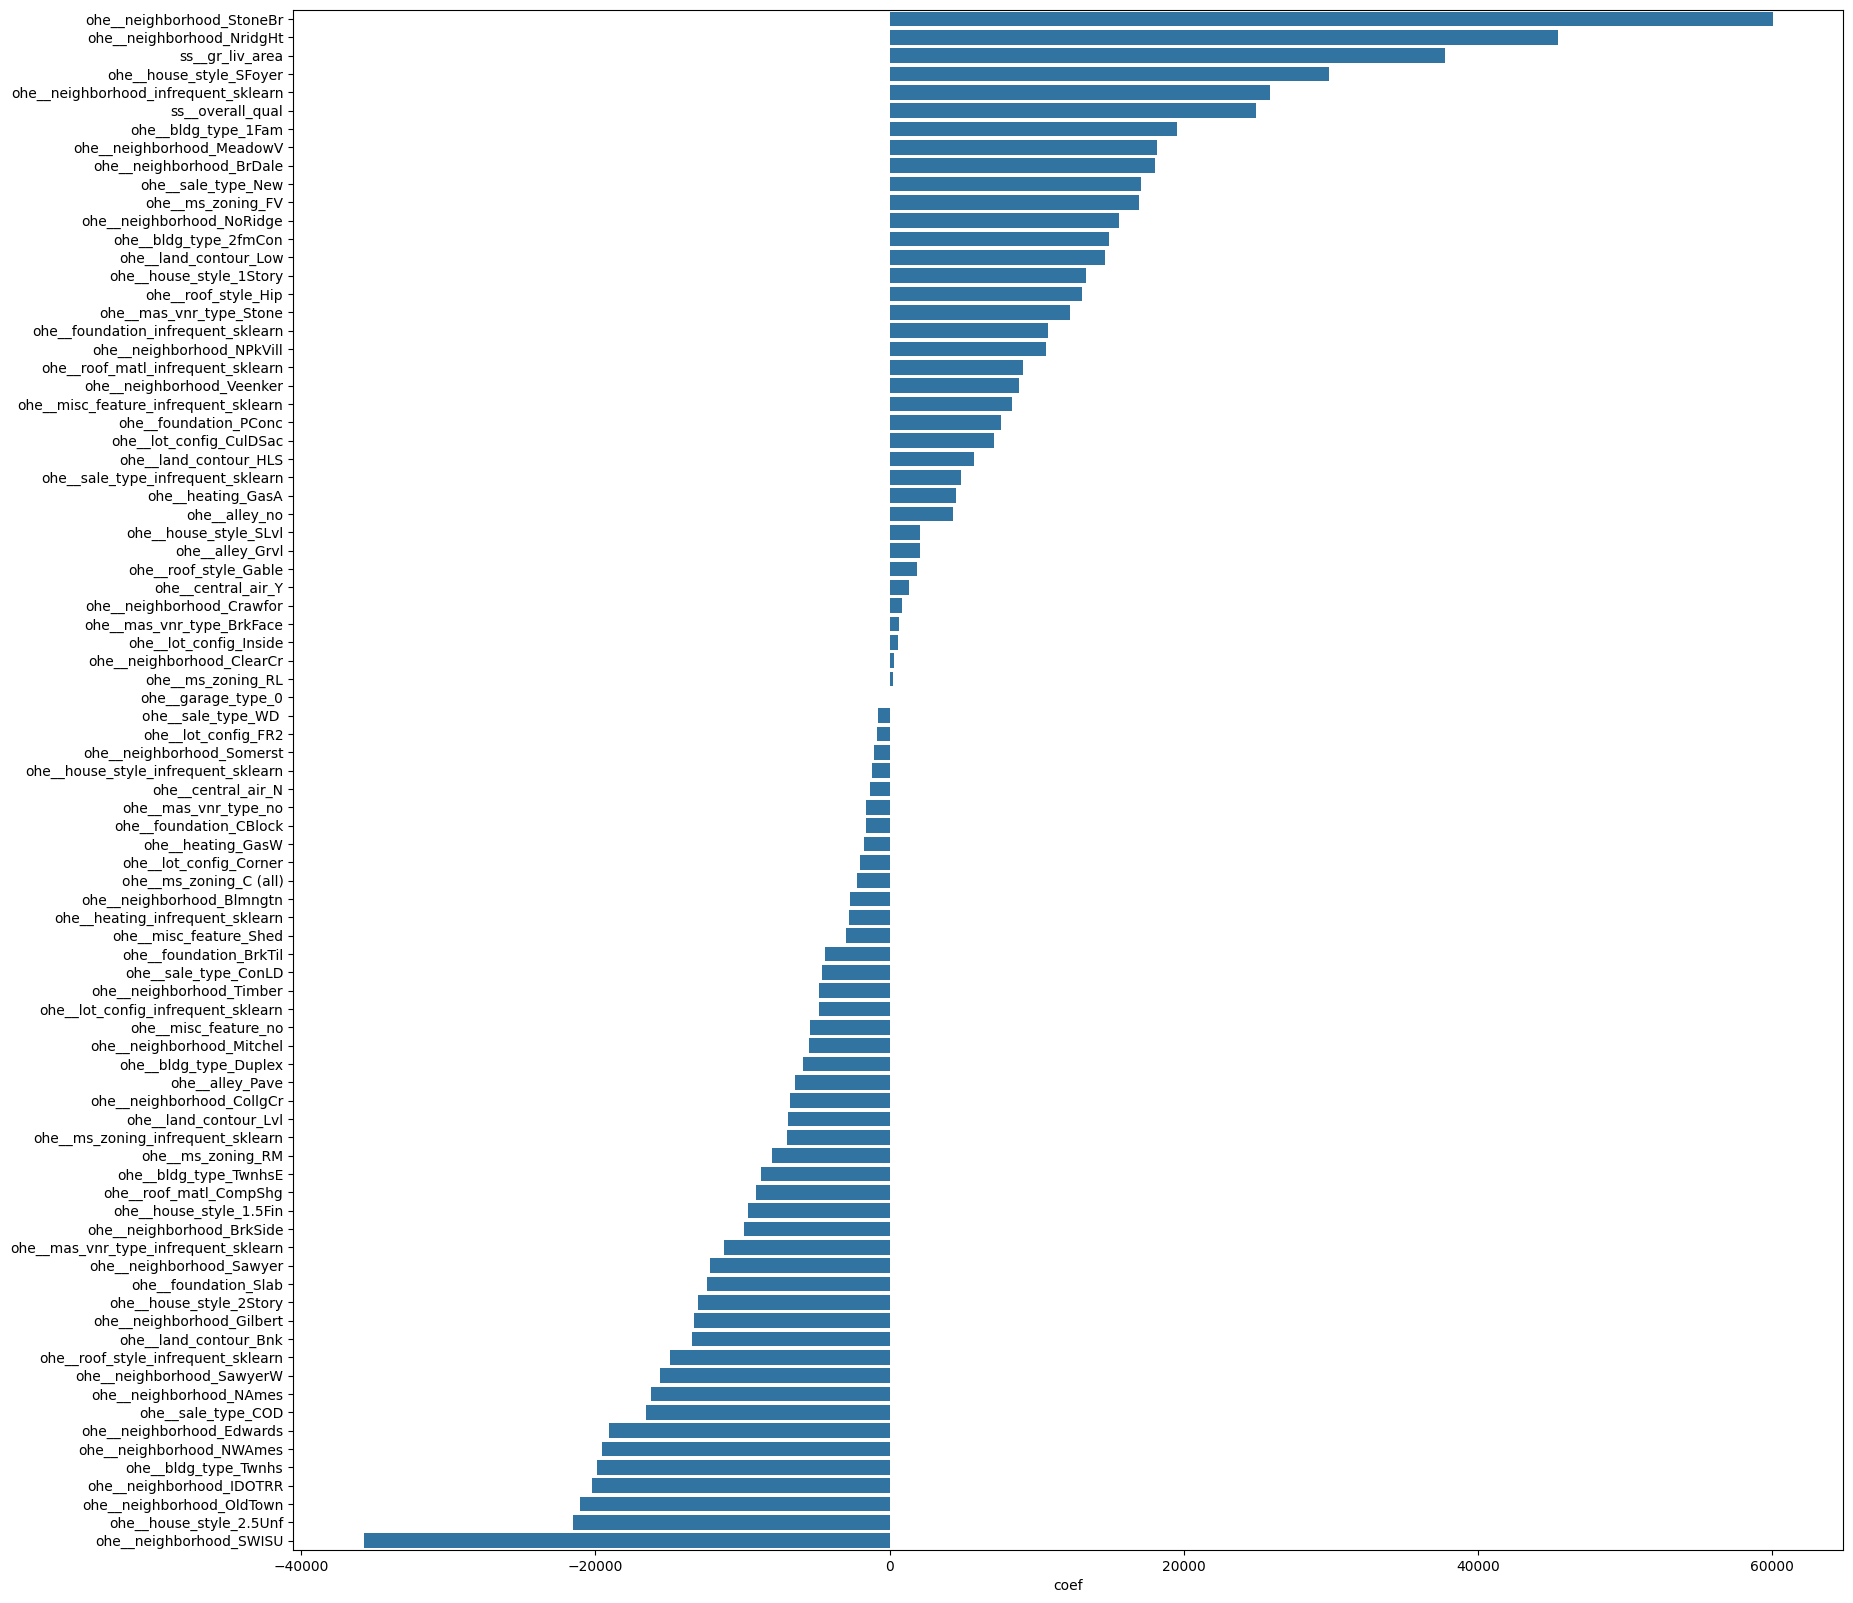

In [119]:
fig, ax= plt.subplots(figsize=(20,20))
sns.barplot(coefs.sort_values(by='coef', ascending=False)['coef'], orient='h');

plt.savefig('../images/coefs_all.jpg')

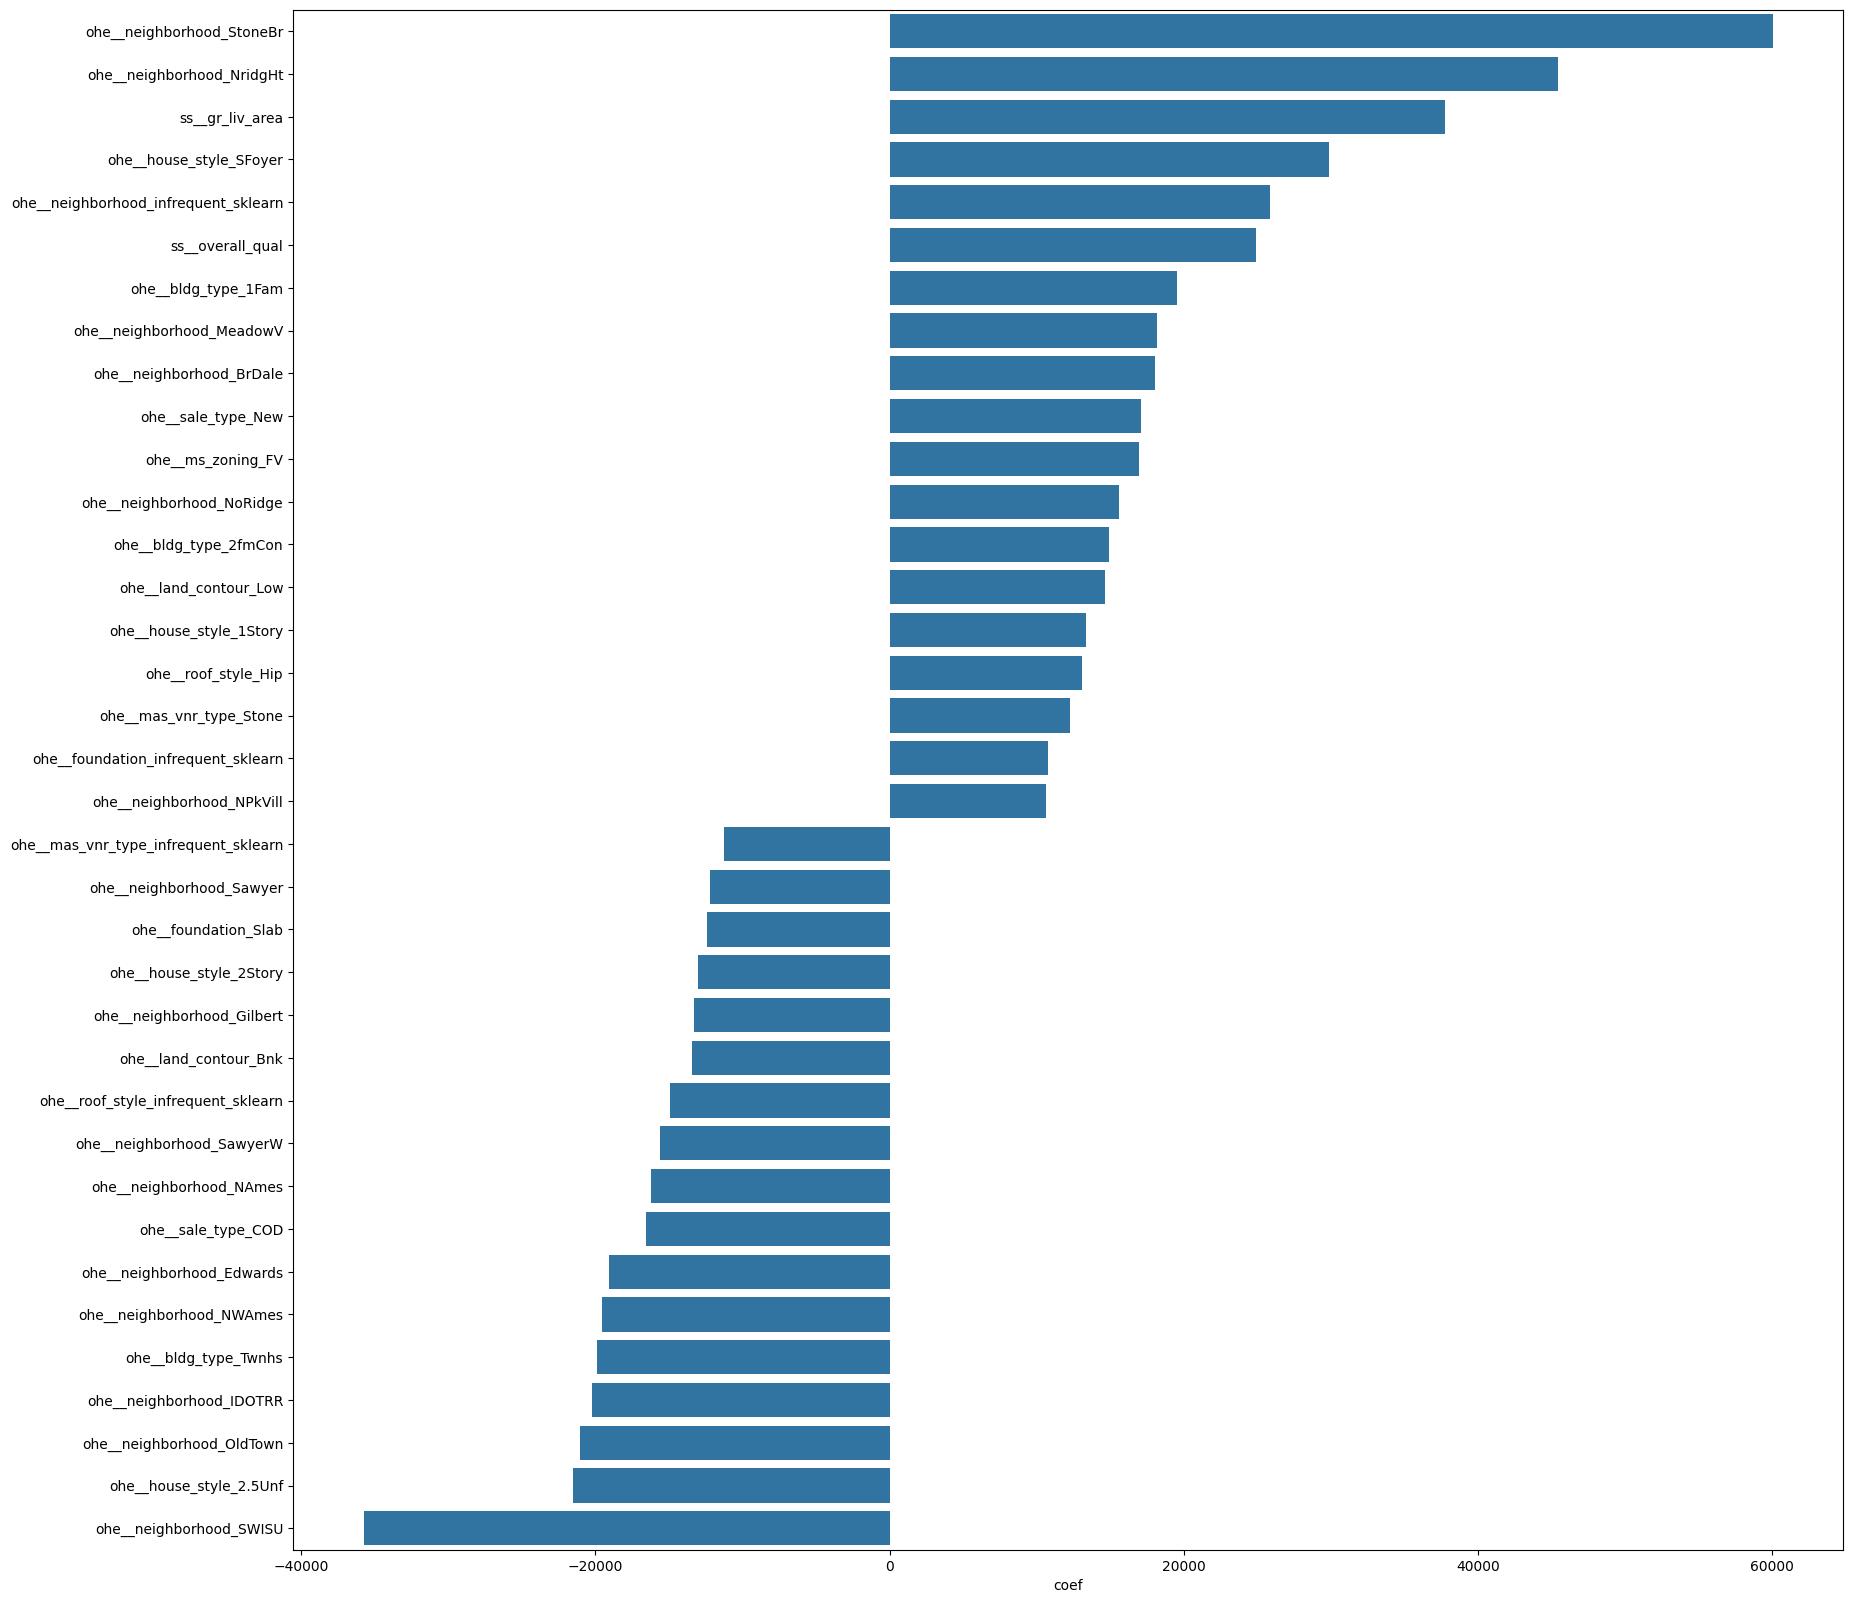

In [125]:
fig, ax= plt.subplots(figsize=(20,20))
sns.barplot(coefs[abs(coefs['coef'])>10_000].sort_values(by='coef', ascending=False)['coef'], orient='h');

plt.savefig('../images/coefs_some.jpg')

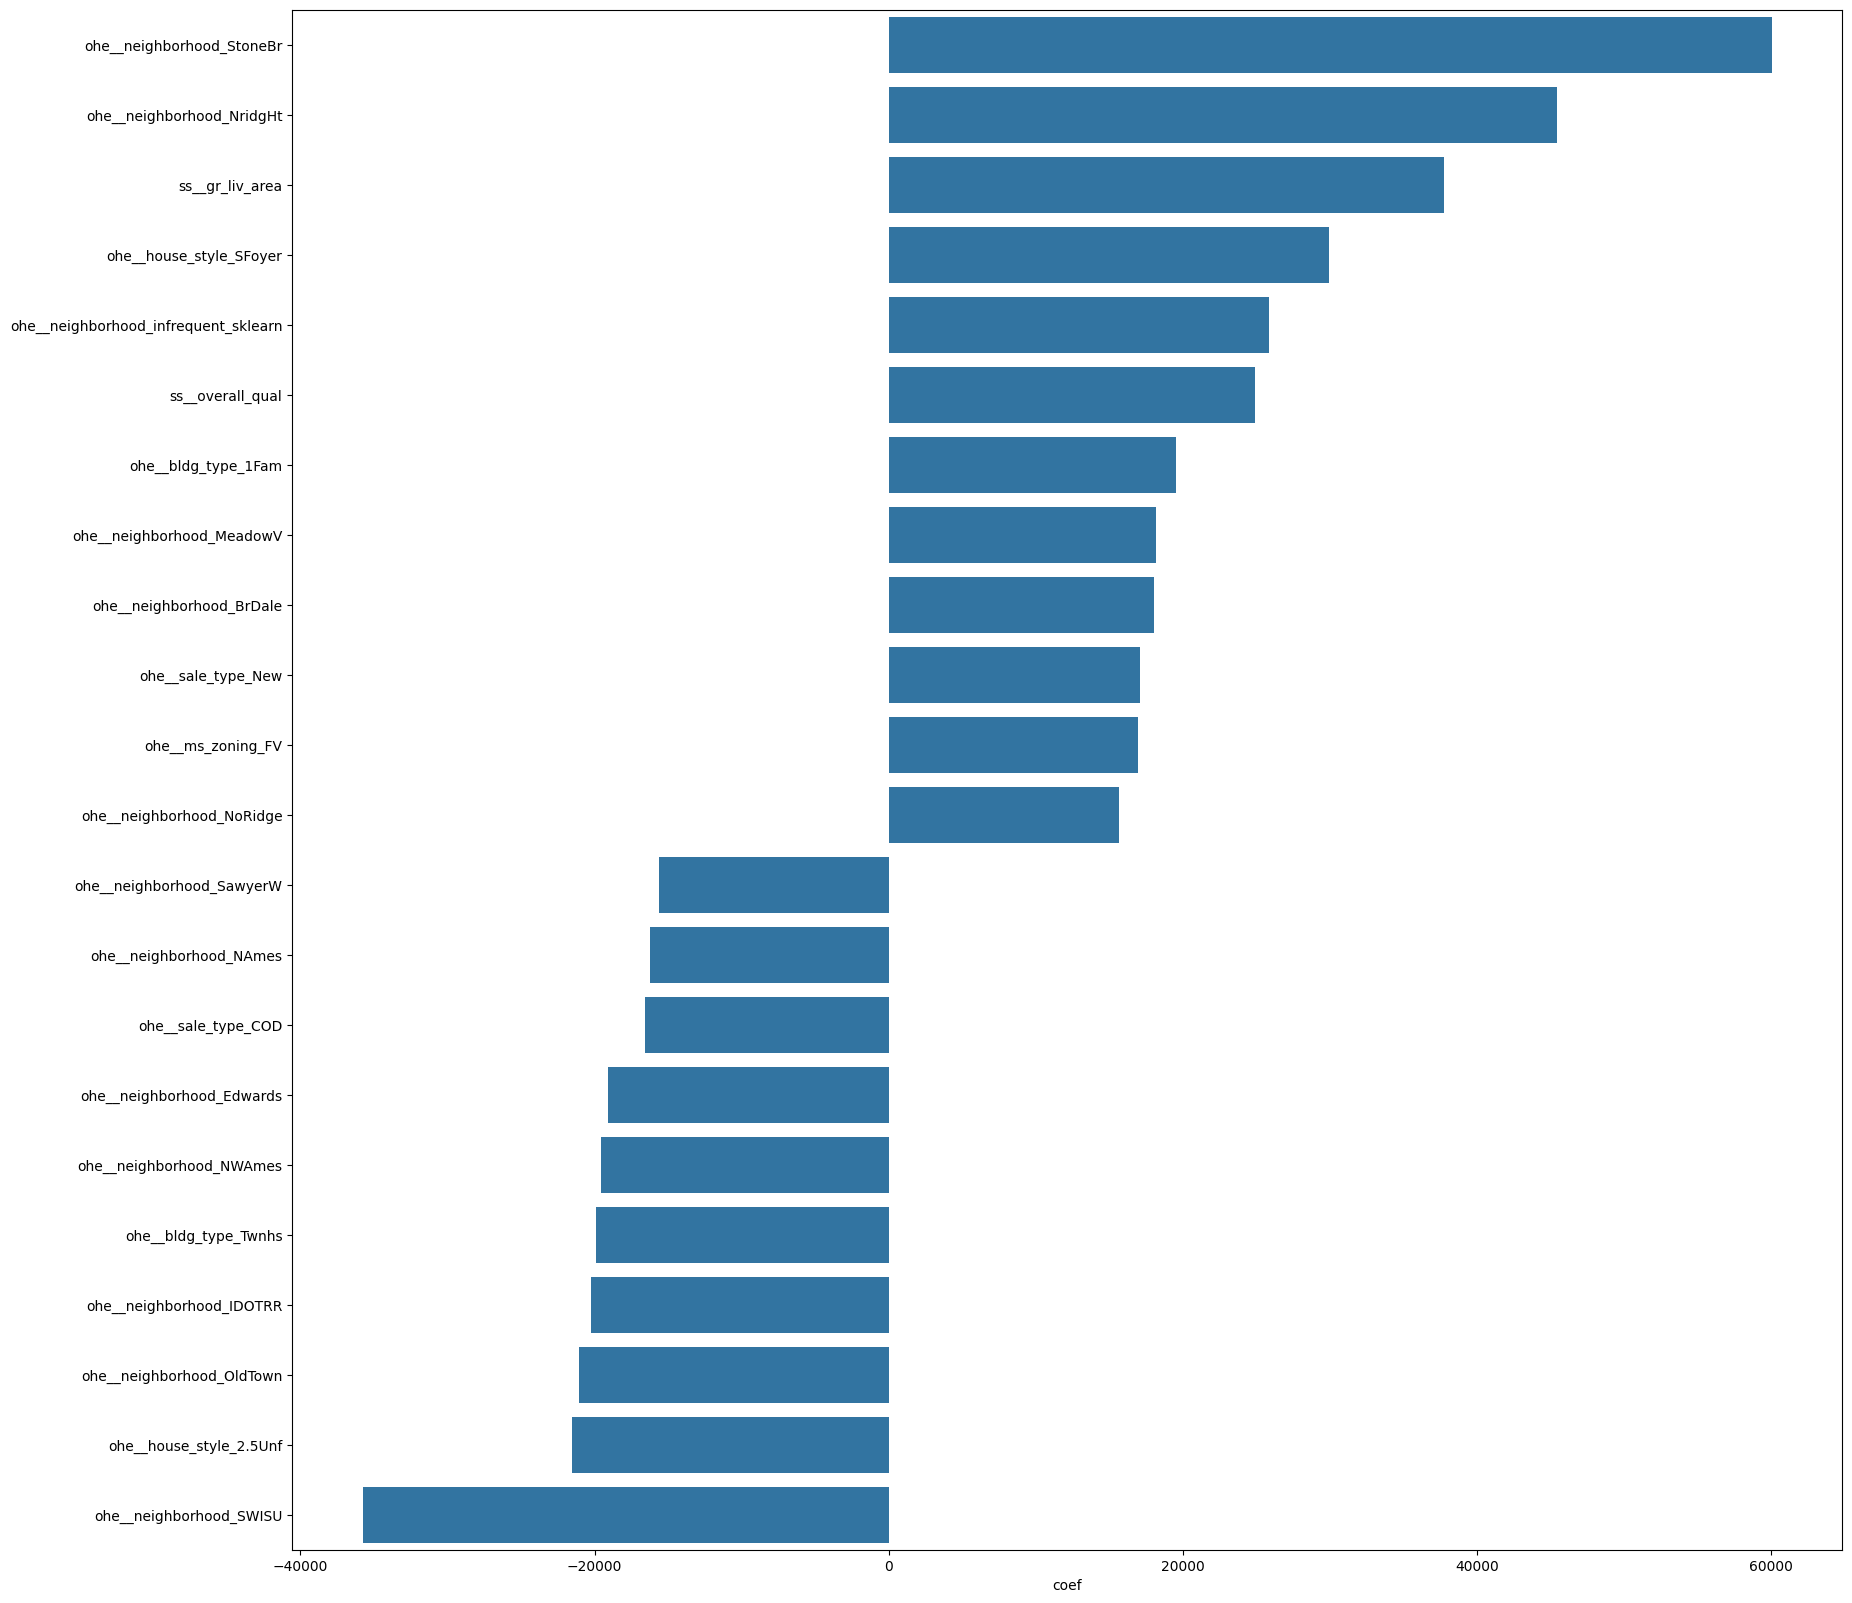

In [126]:
fig, ax= plt.subplots(figsize=(20,20))
sns.barplot(coefs[abs(coefs['coef'])>15_000].sort_values(by='coef', ascending=False)['coef'], orient='h');

plt.savefig('../images/coefs_few.jpg')

By looking at these coefficients, we can see which variables have the largest impact on the sale price.  Remember that these are either OneHotEncoded variables (yes/no, 1/0) or scaled variables (so the units are in terms of that variable's standard deviation).

But we can see that the neighborhood variables show up quite a bit as does the `gr_liv_area` or living area above ground.  The house style `SFoyer` or split-foyer drives up the sale price, townhouses are worse for the sale price.

The `sale_type_COD` means that the sale was done by a court officer deed/estate (probably after the death of the home owner), so a sale by someone who was not the owner, this makes sense.  They are less invested that the owner would be in the sale of the house. While the `sale_type_New` indicates the house was recently built and then sold.  

Finally, note that the neighborhood IDOTRR is Iowa DOT and Rail Road, so probably lots of properties near or adjacent to railroads, which we know will bring down the sale price.

We will use this information for the next round of model building in notebook `04_model_refine.ipynb`

## Ridge Model

In [19]:
pipe_ridge = Pipeline(
    [
        ('ct', ct),
        ('ridge', Ridge())
    ]
)

In [20]:
pipe_ridge.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ss', StandardScaler(),
                                                  ['overall_qual',
                                                   'gr_liv_area']),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                min_frequency=0.007),
                                                  ['house_style',
                                                   'neighborhood', 'heating',
                                                   'ms_zoning', 'sale_type',
                                                   'land_contour', 'roof_style',
                                                   'foundation', 'lot_config',
                                                   'garage_type', 'bldg_type',
                                                   'central_air',
                                                   'mas_vnr_type', 'roof_matl',
                                                   'misc_feature',
                                                   'alley'])])),
                ('ridge', Ridge())])

In [28]:
ridge_params = {
    'ridge__alpha': [0.01, 0.1, 1, 2, 5, 10]
}

In [29]:
gs_ridge = GridSearchCV(
    pipe_ridge,
    ridge_params,
    cv=5
)

In [30]:
gs_ridge.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ss',
                                                                         StandardScaler(),
                                                                         ['overall_qual',
                                                                          'gr_liv_area']),
                                                                        ('ohe',
                                                                         OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                                       min_frequency=0.007),
                                                                         ['house_style',
                                                                          'neighborhood',
                                                                          'heating',
                                                                          'ms_zoning',
                                                                          'sale_type',
                                                                          'land_contour',
                                                                          'roof_style',
                                                                          'foundation',
                                                                          'lot_config',
                                                                          'garage_type',
                                                                          'bldg_type',
                                                                          'central_air',
                                                                          'mas_vnr_type',
                                                                          'roof_matl',
                                                                          'misc_feature',
                                                                          'alley'])])),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [0.01, 0.1, 1, 2, 5, 10]})

In [31]:
gs_ridge.best_score_

0.8483930633771696

In [32]:
gs_ridge.score(X_val, y_val)

0.8011694583193516

In [33]:
gs_ridge.best_estimator_

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ss', StandardScaler(),
                                                  ['overall_qual',
                                                   'gr_liv_area']),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                min_frequency=0.007),
                                                  ['house_style',
                                                   'neighborhood', 'heating',
                                                   'ms_zoning', 'sale_type',
                                                   'land_contour', 'roof_style',
                                                   'foundation', 'lot_config',
                                                   'garage_type', 'bldg_type',
                                                   'central_air',
                                                   'mas_vnr_type', 'roof_matl',
                                                   'misc_feature',
                                                   'alley'])])),
                ('ridge', Ridge(alpha=5))])

In [35]:
scores_ridge = metrics(y_val, gs_ridge.predict(X_val), 'ridge')

Mean squared error: 1254160296.0

Root mean squared error: 35414.0

R2 score: 0.80117

Mean absolute error: 22090.0



In [76]:
scores = pd.concat([linear_scores, scores_ridge], ignore_index=True)

In [77]:
scores

,model,mean_sq_err,root_mean_sq_err,r2,mean_abs_err
0,linear,1.264004e+09,35553.0,0.79961,22283.0
1,ridge,1.254160e+09,35414.0,0.80117,22090.0


## Lasso Model

In [39]:
pipe_lasso = Pipeline(
    [
        ('ct', ct),
        ('lasso', Lasso(max_iter=10_000))
    ]
)

pipe_lasso.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ss', StandardScaler(),
                                                  ['overall_qual',
                                                   'gr_liv_area']),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                min_frequency=0.007),
                                                  ['house_style',
                                                   'neighborhood', 'heating',
                                                   'ms_zoning', 'sale_type',
                                                   'land_contour', 'roof_style',
                                                   'foundation', 'lot_config',
                                                   'garage_type', 'bldg_type',
                                                   'central_air',
                                                   'mas_vnr_type', 'roof_matl',
                                                   'misc_feature',
                                                   'alley'])])),
                ('lasso', Lasso(max_iter=10000))])

In [41]:
lasso_params= {
    'lasso__alpha' : np.linspace(0.001,1,10),
    'lasso__max_iter': [10_000, 20_000, 30_000]
}

In [42]:
gs_lasso = GridSearchCV(
    pipe_lasso,
    lasso_params,
    n_jobs=-1
)

gs_lasso.fit(X_train, y_train)

/Users/erindepree/venvs/dsb_602/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31413384221.13086, tolerance: 822712833.2558172
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/erindepree/venvs/dsb_602/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 144659111172.48096, tolerance: 767987204.621158
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/erindepree/venvs/dsb_602/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59111369525.334595, tolerance: 749579703.9486876
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/erindepree/venvs/dsb_602/l

GridSearchCV(estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ss',
                                                                         StandardScaler(),
                                                                         ['overall_qual',
                                                                          'gr_liv_area']),
                                                                        ('ohe',
                                                                         OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                                       min_frequency=0.007),
                                                                         ['house_style',
                                                                          'neighborhood',
                                                                          'heating',
                                                                          'ms_zoning',
                                                                          'sale_type',
                                                                          'land_contour',
                                                                          'roof_style',
                                                                          'foundation',
                                                                          'lot_config',
                                                                          'garage_type',
                                                                          'bldg_type',
                                                                          'central_air',
                                                                          'mas_vnr_type',
                                                                          'roof_matl',
                                                                          'misc_feature',
                                                                          'alley'])])),
                                       ('lasso', Lasso(max_iter=10000))]),
             n_jobs=-1,
             param_grid={'lasso__alpha': array([0.001, 0.112, 0.223, 0.334, 0.445, 0.556, 0.667, 0.778, 0.889,
       1.   ]),
                         'lasso__max_iter': [10000, 20000, 30000]})

All of these warnings about the LASSO models not converging, means that either this is not a good model or we're not in the correct part of the parameter space.  We will not continue with this model as we have some better options.

In [43]:
gs_lasso.score(X_val, y_val)

0.799659169829665

In [44]:
gs_lasso.best_params_

{'lasso__alpha': 1.0, 'lasso__max_iter': 10000}

In [45]:
gs_lasso.best_score_

0.8461739551032602

In [46]:
prices_lasso = pd.DataFrame(gs_lasso.predict(X_test), columns=['saleprice'])

In [47]:
kaggle_lasso = pd.merge(data_test, prices_lasso, left_index=True, right_index=True, how='inner')

In [48]:
kaggle_lasso[['id', 'saleprice']].to_csv('../data/kaggle_lasso_v2.csv', index=False)

In [78]:
lasso_scores = metrics(y_val, gs_lasso.predict(X_val), 'lasso')

Mean squared error: 1263686719.0

Root mean squared error: 35548.0

R2 score: 0.79966

Mean absolute error: 22272.0



In [79]:
scores = pd.concat([scores, lasso_scores], ignore_index = True)

## KNN Models

In [51]:
pipe_knn = Pipeline(
    [
        ('ct', ct),
        ('knn', KNeighborsRegressor())
    ]
)

pipe_knn.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ss', StandardScaler(),
                                                  ['overall_qual',
                                                   'gr_liv_area']),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                min_frequency=0.007),
                                                  ['house_style',
                                                   'neighborhood', 'heating',
                                                   'ms_zoning', 'sale_type',
                                                   'land_contour', 'roof_style',
                                                   'foundation', 'lot_config',
                                                   'garage_type', 'bldg_type',
                                                   'central_air',
                                                   'mas_vnr_type', 'roof_matl',
                                                   'misc_feature',
                                                   'alley'])])),
                ('knn', KNeighborsRegressor())])

In [53]:
knn_params = {
    'knn__p': [1,2],
    'knn__weights': ['uniform', 'distance'],
    'knn__n_neighbors': [3,5,7,11,15, 25, 40]
}

In [54]:
gs_knn = GridSearchCV(
    pipe_knn,
    knn_params,
    n_jobs=-1
)

In [55]:
gs_knn.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ss',
                                                                         StandardScaler(),
                                                                         ['overall_qual',
                                                                          'gr_liv_area']),
                                                                        ('ohe',
                                                                         OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                                       min_frequency=0.007),
                                                                         ['house_style',
                                                                          'neighborhood',
                                                                          'heating',
                                                                          'ms_zoning',
                                                                          'sale_type',
                                                                          'land_contour',
                                                                          'roof_style',
                                                                          'foundation',
                                                                          'lot_config',
                                                                          'garage_type',
                                                                          'bldg_type',
                                                                          'central_air',
                                                                          'mas_vnr_type',
                                                                          'roof_matl',
                                                                          'misc_feature',
                                                                          'alley'])])),
                                       ('knn', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [3, 5, 7, 11, 15, 25, 40],
                         'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']})

In [56]:
gs_knn.score(X_val, y_val)

0.8375798718717675

In [57]:
gs_knn.best_params_

{'knn__n_neighbors': 7, 'knn__p': 2, 'knn__weights': 'distance'}

In [58]:
prices_knn = pd.DataFrame(gs_knn.predict(X_test), columns=['saleprice'])

In [59]:
kaggle_knn = pd.merge(data_test, prices_knn, left_index=True, right_index=True, how='inner')

In [60]:
kaggle_knn[['id', 'saleprice']].to_csv('../data/kaggle_knn_01.csv', index=False)

In [80]:
knn_scores = metrics(y_val, gs_knn.predict(X_val), 'knn')

Mean squared error: 1024494900.0

Root mean squared error: 32008.0

R2 score: 0.83758

Mean absolute error: 20812.0



In [81]:
scores = pd.concat([scores, knn_scores], ignore_index = True)

## Tree Models

In [63]:
pipe_tree = Pipeline(
    [
        ('ct', ct),
        ('tree', DecisionTreeRegressor(max_depth=5, min_samples_leaf=3))
    ]
)

In [64]:
pipe_tree.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ss', StandardScaler(),
                                                  ['overall_qual',
                                                   'gr_liv_area']),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                min_frequency=0.007),
                                                  ['house_style',
                                                   'neighborhood', 'heating',
                                                   'ms_zoning', 'sale_type',
                                                   'land_contour', 'roof_style',
                                                   'foundation', 'lot_config',
                                                   'garage_type', 'bldg_type',
                                                   'central_air',
                                                   'mas_vnr_type', 'roof_matl',
                                                   'misc_feature',
                                                   'alley'])])),
                ('tree',
                 DecisionTreeRegressor(max_depth=5, min_samples_leaf=3))])

In [66]:
gs_tree = GridSearchCV(
    pipe_tree,
    {
        'tree__max_depth': [6,7, 8,9,10,11,12,15],
        'tree__min_samples_leaf': [5,8,9,12,15, 18]
    },
    cv=5,
    n_jobs=-1
)

In [67]:
gs_tree.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ss',
                                                                         StandardScaler(),
                                                                         ['overall_qual',
                                                                          'gr_liv_area']),
                                                                        ('ohe',
                                                                         OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                                       min_frequency=0.007),
                                                                         ['house_style',
                                                                          'neighborhood',
                                                                          'heating',
                                                                          'ms_zoning',
                                                                          'sale_type',
                                                                          'land_contour',
                                                                          'roof_style',
                                                                          'foundation',
                                                                          'lot_config',
                                                                          'garage_type',
                                                                          'bldg_type',
                                                                          'central_air',
                                                                          'mas_vnr_type',
                                                                          'roof_matl',
                                                                          'misc_feature',
                                                                          'alley'])])),
                                       ('tree',
                                        DecisionTreeRegressor(max_depth=5,
                                                              min_samples_leaf=3))]),
             n_jobs=-1,
             param_grid={'tree__max_depth': [6, 7, 8, 9, 10, 11, 12, 15],
                         'tree__min_samples_leaf': [5, 8, 9, 12, 15, 18]})

In [68]:
gs_tree.best_params_

{'tree__max_depth': 9, 'tree__min_samples_leaf': 5}

In [69]:
gs_tree.score(X_val,y_val)

0.7894033107984981

In [70]:
prices_tree = pd.DataFrame(gs_tree.predict(X_test), columns= ['saleprice'])

In [71]:
kaggle_tree = pd.merge(data_test, prices_tree, left_index=True, right_index=True, how='inner')

In [72]:
kaggle_tree[['id', 'saleprice']].to_csv('../data/kaggle_tree_01.csv', index=False)

In [82]:
tree_scores = metrics(y_val, gs_lasso.predict(X_val), 'tree')

Mean squared error: 1263686719.0

Root mean squared error: 35548.0

R2 score: 0.79966

Mean absolute error: 22272.0



In [83]:
scores = pd.concat([scores, tree_scores], ignore_index = True)

## Model Reflection

In [84]:
scores

,model,mean_sq_err,root_mean_sq_err,r2,mean_abs_err
0,linear,1.264004e+09,35553.0,0.79961,22283.0
1,ridge,1.254160e+09,35414.0,0.80117,22090.0
2,lasso,1.263687e+09,35548.0,0.79966,22272.0
3,knn,1.024495e+09,32008.0,0.83758,20812.0
4,tree,1.263687e+09,35548.0,0.79966,22272.0


The knn model is the best according to the scores on the validation data set.  However, the linear model is most helpful for interpretation.